### Introduction

Kiva.org is an online crowdfunding platform that distributes loan or financial services to the poor people around the world. Kiva has global network of 'Field Partner' to reach to the target remote places. These partners are local organizations working in the communities to vet borrowers, provide loans and services.

In this excercise, I will investigate the Kiva loans in the Phillippines.
The specific aim is to identify the potential regions that might be currently out of Kiva's network, in order to identify the opportunities for setting new Field Partners ?

In [1]:
# importing modules
import geopandas as gpd

In [4]:
# Reading the data in the GeoDataFrame
loans_filepath = r"C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\kiva_loans\kiva_loans\kiva_loans.shp"
world_loans = gpd.read_file(loans_filepath)

world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [6]:
world_loans.country.unique()

array(['Cambodia', 'Samoa', 'Mozambique', 'Ukraine', 'Azerbaijan',
       'Cameroon', 'Mongolia', 'Dominican Republic', 'Bolivia',
       'Guatemala', 'Sierra Leone', 'Paraguay', 'Nepal', 'Tajikistan',
       'Uganda', 'Lebanon', 'Palestine', 'El Salvador', 'Indonesia',
       'Tanzania', 'Peru', 'Nicaragua', 'Senegal', 'Rwanda', 'Honduras',
       'Vietnam', 'Philippines', 'Costa Rica', 'Panama', 'Mexico',
       'United States', 'Kenya', 'Ecuador', 'Armenia', 'Colombia',
       'The Democratic Republic of the Congo', 'Burundi', 'Kyrgyzstan',
       'Israel', 'Georgia', 'Liberia', 'Jordan', 'Burkina Faso', 'Turkey',
       'Yemen', 'Malawi', 'Zambia', 'South Africa', 'Ghana', 'India',
       'Thailand', 'Brazil', 'Haiti', 'Albania', 'Kosovo', 'Timor-Leste',
       'Pakistan', 'Belize', 'Nigeria', 'Togo', 'Suriname', 'Mali',
       'Zimbabwe', 'Madagascar', 'Somalia', 'Myanmar (Burma)',
       "Lao People's Democratic Republic", 'Solomon Islands', 'China',
       'Afghanistan', 'Moldov

### Plotting world country boundaries

In [9]:
# we will use dataset provided in GeoPandas to plot the world containing country boundaries
#world_filepath = gpd.datasets.get_path('naturalearth_lowers')
#world = gpd.read_file(world_filepath)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

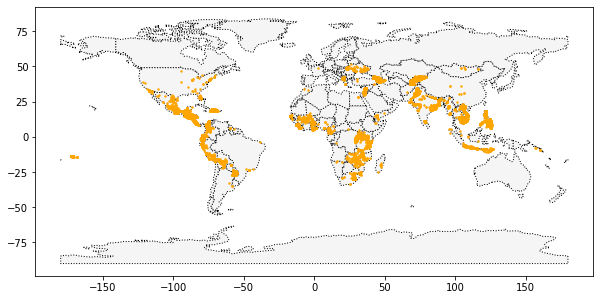

In [11]:
# Vizualize Kiva loan locations accross the world 
# use both world and world_loans geodataframe

# first plot the world map which has boundary as base map
ax = world.plot(figsize=(10,10), color= 'whitesmoke', edgecolor= 'black', linestyle=':')
# adding world_loans to the base map
world_loans.plot(ax=ax, color='orange', markersize = 2)

### Select loans based in the Phillipines

In [12]:
PHL_loans = world_loans[world_loans['country']=='Philippines'].copy()
# alternative code
#PHL_loans = world_loans.loc[world_loans.country =='Philippines'].copy()

In [14]:
# load data containing boundaries for all islands in the Phillipines
gpd.io.file.fiona.drvsupport.supported_drivers['KML']='rw'
PHL = gpd.read_file(r'C:\Users\Rabbil\Documents\GeoPython\geoAnalysis_Kaggle\Philippines_AL258.kml')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<AxesSubplot:>

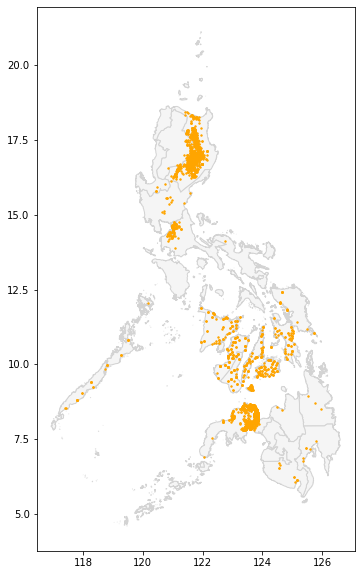

In [15]:
# now visualize the loans in the Phillipines using PHL and PHL_loans
ax = PHL.plot(figsize=(10,10), color='whitesmoke', edgecolor='lightgray')
PHL_loans.plot(ax=ax, color='orange', markersize=2 )

So, from this map above we see that there are many potential islands where Kiva can extend theri activities. Specially in the central part of Phillipines stand out as relatively large islands as a potential location to recurit new Field Partners